# <center>Lab Machine Learning 6</center>

## <center>Souaybou Bagayoko</center>
### <center> Semester 2, Nr: 303189 </center>



### Dataset 

• 1. Regression Datasets
(a) Generate a Sample dataset called D1 :
i. Initialize matrix x ∈ R100×1 using Uniform distribution with μ = 1 and σ = 0.05 ii. Generate target y ∈ R100×1 using y = 1.3x2 + 4.8x + 8 + ψ, where ψ ∈ R100×1 randomly initialized.
(b) Wine Quality called D2: (use winequality-red.csv)http://archive.ics.uci.edu/ml/ datasets/Wine+Quality


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model 
from sklearn import datasets

%matplotlib inline
plt.style.use('seaborn-white')

### D1 

In [2]:
#generating the Regression Dataset   
N = 100                                                #size of the data 
X_gen = np.random.normal(loc= 1 , scale= 0.05, size=(N,1)) # initiallizing x size 100X1
phi = np.random.rand(N,1)                              # initializing ψ with size 100X1
Y_gen =  1.3*X_gen**2 + 4.8*X_gen + 8 + phi

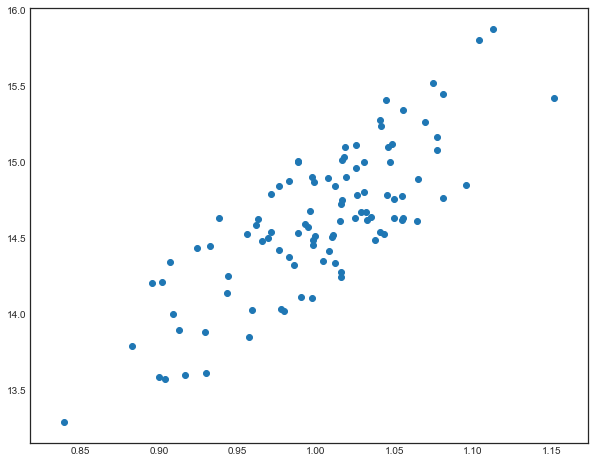

In [3]:
plt.figure(figsize=(10,8))
plt.scatter(X_gen, Y_gen)

### D2

In [4]:
#Processing the Wine dataset 
Wine_data = pd.read_csv('winequality-red.csv', sep=';') # this is a semicolumn separedt file, 

Wine_data.dropna(inplace=True)
                                                    #therefor it requires to set the delimiter = ';'
# Data describtion and info 
Wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


***Exercise*** 1: Generalized Linear Models with Scikit Learn (5 Points)
In previous labs you have implemented various optimization algorithms to solve linear or logistic regression problem. In this task you are required to use Scikit Learn to experiment with following linear models and Stochastic Gradient Descent (SGD) [Hint: use SGDRegressor]. You may use scikit learn for this question.
1. Ordinary Least Squares 
2. Ridge Regression
3. LASSO

Following are required in this task 
1. plit your data into Train and Test Splits. Use dataset D2
2. For each model, pick three sets of hyperparameters and learn each model (without cross validation). Measure Train and Test RMSE and plot it on one plot. Explain the plots and relate it to the theory studied in lectures i.e. influence of regular- ized vs non-regularized models. You have to compare the following models and argument should explain underfitting and overfitting.
4. Now tune the hyperparameters using scikit learn GridSearchCV and plot the re- sults of cross validation for each model. [Hint: use cv results to see different options]
5. Using the optimal hyperparameter you have to evaluate each model using cross val score. Plot each model using boxplot and explain how significant are your results.

***1. SPLITING THE DATA***

In [5]:
def data_split(data, percentage, seed, index_reset=False):
    train = data.sample(frac=percentage/100, random_state=seed)
    tes = data.drop(train.index)
    if index_reset != False:
        train.reset_index(drop=True, inplace=True)
        tes.reset_index(drop=True,inplace=True)
    return train, tes

In [6]:
#------------Spliting-----------------------------------
Wine_train , Wine_test = data_split(Wine_data, 80, 50, True)

#---------Wine---------------------------------
X_wine = Wine_train.drop('quality',axis=1).values
Y_wine = Wine_train['quality'].values 
Y_wine = Y_wine.reshape(-1,1)

X_wine_test = Wine_test.drop('quality',axis=1).values
Y_wine_test = Wine_test['quality'].values 
Y_wine_test = Y_wine_test.reshape(-1,1)

***Normailizing the Data 

In [7]:
#----Scaling functions ------------------------ 
def Stand_dev(M):
    "this return the standart deviation the column"
    return np.sqrt(sum((M-M.mean())**2)/len(M))

def scale(X):
    "REscaling the Training dataset, this return the normilize of the columns "
    for i in range(X.shape[1]):
        mean = np.mean(X[:,[i]])
        m = min(X[:,[i]])
        ma = max(X[:,[i]])
     
        X[:,[i]] = (X[:,[i]]-mean)/Stand_dev(X[:,[i]])
 
    
#---------end------------------------------------------


In [8]:
#applying the the normilize funciton to the dataset, Here `i will only scale the Xs 
to_scale = [X_wine,  X_wine_test]  # 
for i in to_scale:
    scale(i)

In [9]:
# Function for calculating RMSE 
def rmse_calc(y_true, y_pred):
    rmse_val = np.round(np.sqrt(mean_squared_error(y_true, y_pred)), 5)
    return rmse_val

# Plotting functions
def model_plot(learning_rate, train_rmse, test_rmse, title):
    x_length = range(len(learning_rate))
    plt.scatter(x_length, train_rmse, label='Train RMSE')
    plt.scatter(x_length, test_rmse, label='Test RMSE')
    plt.xticks(x_length, learning_rate)
    plt.title(title)
    plt.xlabel("Learning Rate")
    plt.ylabel("RMSE value")
    plt.legend()
    plt.show()
    
def model3d_plot(x, y, z, z2, title):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111, projection='3d')
    fig.add_axes([0,0,1,1]).axis("off")
    ax.scatter(x, y, z, zdir='z', label='Train')
    ax.scatter(x, y, z2, zdir='z', label='Test')
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Learning Rate, α')
    ax.set_ylabel('Reg. constant, λ')
    ax.set_zlabel('RMSE value')
    ax.legend(loc='best')
    #fig.show()

In [13]:
def RMSE(Y, Y_hat):
    return np.sqrt(np.sum((Y-Y_hat)**2)/len(Y))   

def SGDmodel(X_train, Y_train, X_test, Y_test, model, name, alpha, hyper):
    if name == 'ols':
        para = dict(learning_rate = 'constant',  eta0 = alpha, penalty = None, max_iter=1000, tol=-np.infty) 
    elif name == 'ridge_re':
        para = dict(learning_rate = 'constant', alpha=hyper,  eta0 = alpha, penalty = 'l1', max_iter=1000, tol=-np.infty) 
    else:
        para = dict(learning_rate = 'constant', alpha=hyper, eta0 = alpha, penalty = 'l2', max_iter=1000, tol=-np.infty) 
        
    model.set_params(**para)
    
    model.fit(X_train, Y_train.ravel())
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)   
    rmse_train = RMSE(Y_train, pred_train)
    rmse_test = RMSE(Y_test, pred_test)
    
    return rmse_train, rmse_test

 

In [16]:
from itertools import product 

models = dict(ols=linear_model.SGDRegressor(), \
              ridge_re=linear_model.Ridge(),\
              LASSO=linear_model.Lasso())

X_train = X_wine.copy()
y_train = Y_wine.copy()
X_test = X_wine_test.copy()
y_test = Y_wine_test.copy()
alpha = [0.01, 0.0001, 0.00001]
lambd = [0.00001, 0.001, 1]
############################################STORING THE RMSE VALUES###################
Rmse_his_train = dict(ols=[],ridge_re=[], LASSO=[])
Rmse_his_test  = dict(ols=[],ridge_re=[], LASSO=[])
 
hyperparam = set(product(alpha, lambd)) # putting all combination in the set as to enforce the uniquness
    
for name, clf in models.items():
    for al, lamd in hyperparam:
        train, test = SGDmodel(X_train, y_train, X_test, y_test, clf, name, al, lamd)
        Rmse_his_train[name].append(train)  
        Rmse_his_test[name].append(test)   



ValueError: Invalid parameter learning_rate for estimator Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001). Check the list of available parameters with `estimator.get_params().keys()`.

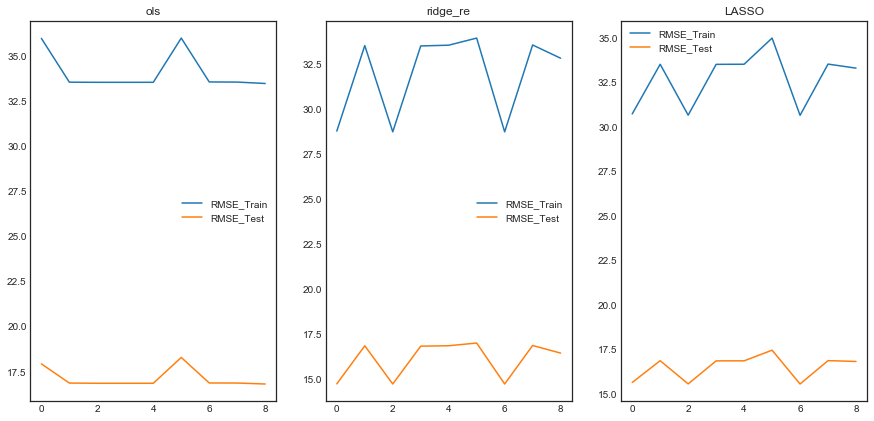

In [12]:
########Ploting ########################
x_len = list(range(len(hyperparam)))
fig, ax = plt.subplots(nrows=1,ncols=3 ,figsize=(15, 7))
t = 0 
for name, clf in models.items():
     
    ax[t].plot(x_len, Rmse_his_train[name] , label='RMSE_Train')
    ax[t].plot(x_len,Rmse_his_test[name], label='RMSE_Test')
    ax[t].legend(loc='best')
    ax[t].title.set_text(name)
    t +=1
    

### POLYNOMIAL LINEAR REGRESSION 

In [17]:
#################GENRETING THE DATA ###########################
N = 100                                                #size of the data 
X_gen = np.random.normal(loc= 1 , scale= 0.05, size=(N,1)) # initiallizing x size 100X1
phi = np.random.rand(N,1)                              # initializing ψ with size 100X1
Y_gen =  1.3*X_gen**2 + 4.8*X_gen + 8 + phi


In [21]:
poly_features = PolynomialFeatures(degree = 2)
X_poly = poly_features.fit_transform(X_gen)

### Task A: Prediction with high degree of polynomials

***Polynomila degree = 1***

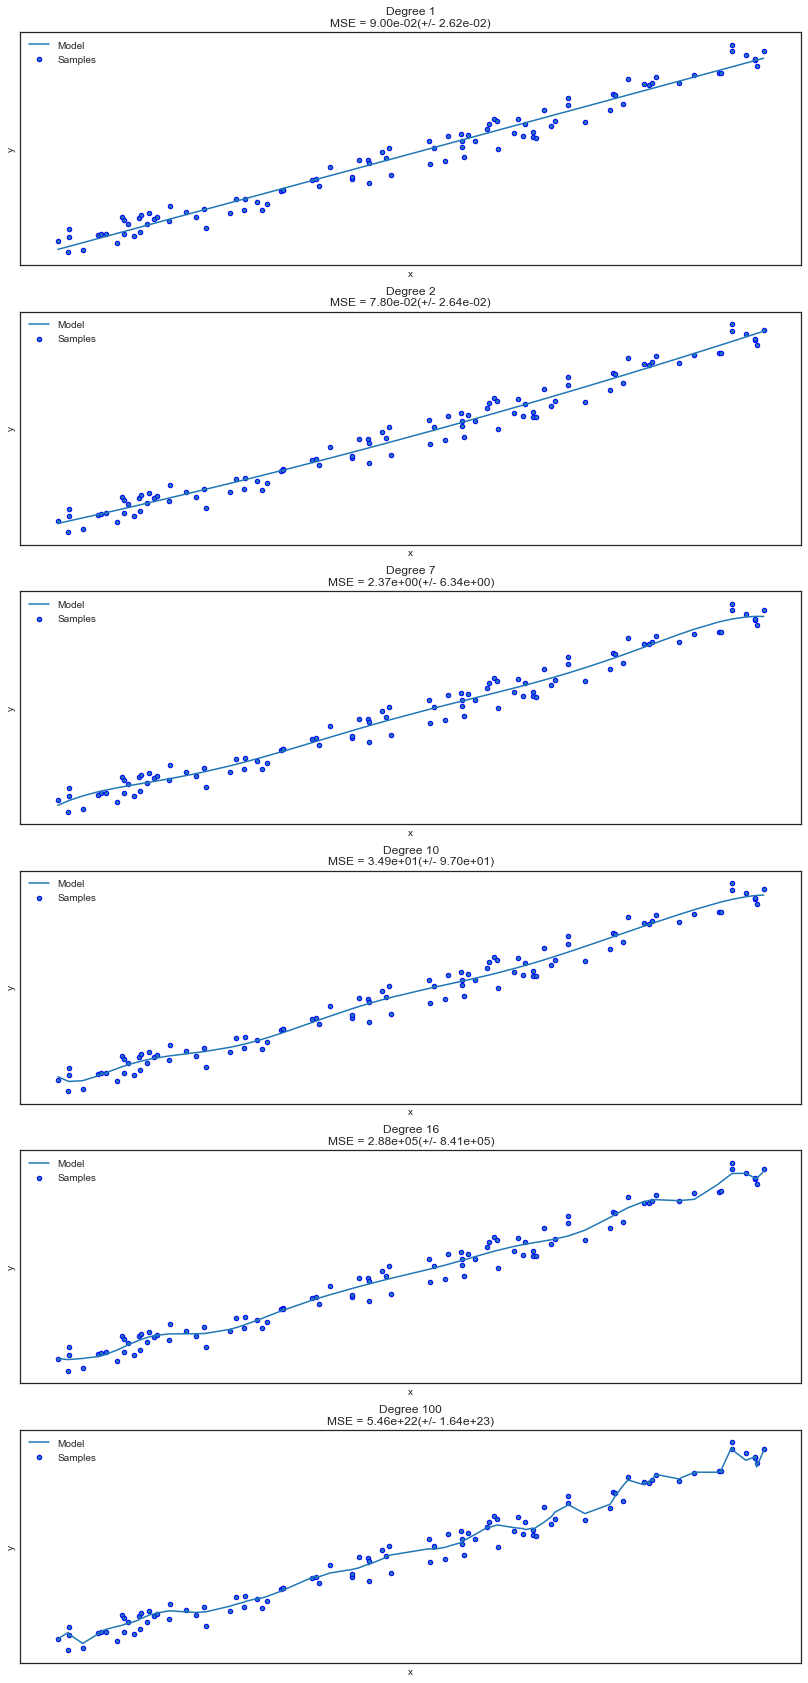

In [87]:
# from https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    phi = np.random.rand(100)                              # initializing ψ with size 100X1

    return 1.3*X**2 + 4.8*X + 8 + phi

np.random.seed(0)

n_samples = 100
degrees = [1, 2, 7, 10, 16 , 100]
X = np.sort(np.random.rand(n_samples))
y = true_fun(X)  

plt.figure(figsize=(14, 30))
for i in range(len(degrees)):
    ax = plt.subplot(len(degrees),1, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    pipeline = make_pipeline(PolynomialFeatures(degree=degrees[i],
                                             include_bias=True),LinearRegression())
 
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = X
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

#### Comment:
We notice that the model is fitting as many data points as its degree increases. The model is fiting to noise 

### Task B: Effect of Regularization

In [89]:

alphas =  [0, 10**-6,10**-2, 1]
RIDGE = linear_model.Ridge()
poly_model = linear_model.LinearRegression(copy_X=True)

poly_features = PolynomialFeatures(degree = 10) # setting the degree of our polynomila 
X_poly = poly_features.fit_transform(X_gen)         # transforming the traninng to higher polynimial 

fig, ax = plt.subplots(nrows=4,ncols=2 ,figsize=(15, 30))


for row, alpha in enumerate(alphas):
    RIDGE.set_params(alpha=alpha )
    RIDGE.fit(X_poly, Y_gen)
    pred = RIDGE.predict(X_poly)

    poly_model.fit(X_poly, Y_gen)
    pred_poly = poly_model.predict(X_poly)
    ax[row][0].scatter(X_gen, Y_gen, s=30, c='red', marker='+', zorder=10)
    ax[row][0].plot(X_gen,pred, label=f"alpha= {alpha}\n Score: {r2_score(Y_gen, pred)}")
    ax[row][0].legend(loc='best')
    
    ax[row][1].scatter(X_gen, Y_gen, s=30, c='red', marker='+', zorder=10)
    ax[row][1].plot(X_gen,pred_poly, label=f"polynimial degree:10\n Score: {r2_score(Y_gen, pred_poly)}")
    ax[row][1].legend(loc='best')
    
    ax[row][0].title.set_text('Regularize')
    ax[row][1].title.set_text('Non-regularize')




ValueError: Expected 2D array, got 1D array instead:
array=[0.01323686 0.01642963 0.020651   0.02467873 0.02566272 0.06395527
 0.06724963 0.08342244 0.09784448 0.10029394 0.11753186 0.13206811
 0.13690027 0.14484776 0.14814086 0.17960368 0.18327984 0.18563594
 0.18984791 0.20747008 0.21331198 0.21550768 0.21689698 0.22431703
 0.23170163 0.24082878 0.25394164 0.26332238 0.27354203 0.27762871
 0.28173011 0.29214753 0.29302028 0.31179588 0.32001715 0.33815895
 0.34723352 0.35561274 0.36858461 0.37416998 0.37775184 0.38346389
 0.3960597  0.42468547 0.45369684 0.46357542 0.47837031 0.4856276
 0.48805628 0.49739137 0.51131898 0.51737911 0.51820071 0.53657921
 0.55219247 0.56542131 0.58447607 0.58641017 0.58678435 0.58831711
 0.61787669 0.62898184 0.63044794 0.63947252 0.6630782  0.66991655
 0.67939277 0.68748828 0.69634349 0.71685968 0.73085581 0.74866362
 0.75837865 0.76532525 0.78515291 0.79804683 0.79920259 0.82211773
 0.83104846 0.84894356 0.86219152 0.86385561 0.87265066 0.87428797
 0.87650525 0.89667129 0.90371974 0.92952932 0.94043195 0.9413777
 0.94737059 0.94931882 0.95279166 0.96083466 0.96157015 0.96193638
 0.97291949 0.97749514 0.98182939 0.99033895].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    phi = np.random.rand(100)                              # initializing ψ with size 100X1

    return 1.3*X**2 + 4.8*X + 8 + phi

np.random.seed(0)

n_samples = 100
degrees = [1,2, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X)  

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
#     plt.xlim((0, 1))
#     plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

#### Comment
Using the Ridge regression, the regularization parameter decrease the effect of Overfiting, this tend to generalize the model. In that case the model is prone to learn the True signal not the noise.
The Increase of the Hyperparameter alpha ===> decrases the overfiting and minimize the residual 

## Coordinate Descent

#### Question:
Figure 1: Coordinate Descent Algorithm
1. Task A: Coordinate Descent.
a Implement Coordinate Descent.
b Maintain a history of your β values. After training plot them against it- erations [hint: If you have 10 features, you should have 11 βs (one bias, 10 features)]. Plot them all in a singel plot. This should show you the progression of your feature values as your train the model.

2. Task B: Coordinate Descent with L1 Regularization
a Implement CD with L1 regularization (Fig. 2). Note that the update step is now including the L1 term.
b Maintain a history of your β values. After training plot them against itera- tions.
3. Task C: Comparison

### Task A:


In [19]:
#implementing coodinate diescent 
#############################################
#implementing coodinate diescent 

def predict(X, Theta):
    return np.dot(X, Theta)

def lin_func(X,Y,Theta,lam=0):
    M = len(Y)
     
    return np.sum((Y-predict(X,Theta))**2)*(1/(M)) + lam*L2reg(Theta)


    
def g(x,y,beth, j): 
    x_m_square = np.sum(np.square(np.take(x,j,axis=1)))
    return ((y - np.dot(np.delete(x,j, axis=1), np.delete(beth, j))).T.dot(np.take(x,j,axis=1)))/ x_m_square

            
def soft_threshold(x,y,beth,lam, j ):
    x_m_square = np.sum(np.square(np.take(x,j,axis=1)))
    g_t = g(x,y,beth, j)
    lasso = (1/2*lam)/x_m_square
    if g_t > lasso :
        return  g_t - lasso
    elif g_t < -lasso :
        return g_t + lasso
    else: 
        return 0
        

def learn_linreg_CD(x,y, b_0=None, max_iter=300, lam=None, intercep=False):
    
    if intercep:                                     #adding the intercep to the X 
        ones = np.ones(x.shape[0]).reshape(-1,1)
        x    = np.hstack([ones, x])
        #ones_tes = np.ones(X_test.shape[0]).reshape(-1,1)
        #X_test    = np.hstack([ones_tes, X_test])
    if  np.any(b_0) == None:
        b_0     = np.zeros(x.shape[1]) 
    history = {}
    
    b_new = b_0
    for i in range(len(b_0)):
        history[i] = []          #storing the paramter in values, each parameter will have its own list 
    
    if lam != None :            # if given lambda for lasso regulatiration 
        Rms = soft_threshold
        paramters = {'x':x,'y':y,'beth':b_new,'lam':lam}
    else :                      # if not then we use a simple non-regularise 
        Rms = g
        paramters = {'x':x,'y':y,'beth':b_new}
    
    
    for it in range(max_iter):  
        for f in range(len(b_0)):
            b_new[f] = Rms(**paramters,j=f)
            
            history[f].append(b_new[f])
        b_0 = b_new
    return b_new.flatten(), history

  
    

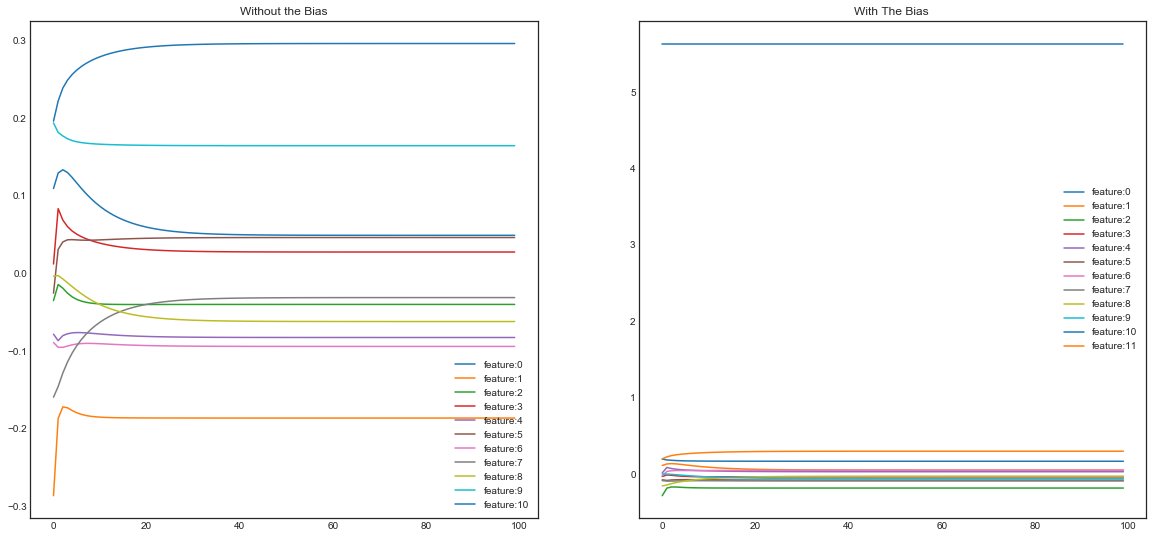

In [20]:
test, his = learn_linreg_CD(X_wine, Y_wine.flatten(), b_0=None, max_iter=100)
test1, his1 = learn_linreg_CD(X_wine, Y_wine.flatten(), b_0=None,max_iter=100,intercep=True)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,9.15))

for i in range(len(test1)):
    if i < len(test1)-1:
        ax[0].plot(his[i],label=f"feature:{i}")
        ax[0].legend(loc='best')
        ax[0].title.set_text('Without the Bias')

        ax[1].plot(his1[i],label=f"feature:{i}")
        ax[1].legend(loc='best')
        ax[1].title.set_text('With The Bias ')
    else :
        
        ax[1].plot(his1[i],label=f"feature:{i}")
        ax[1].legend(loc='best')
        ax[1].title.set_text('With The Bias ')




### Task B:  


(0.06309573444801936,
 1584.8931924611109,
 -0.21111729916521832,
 0.3289567259056744)

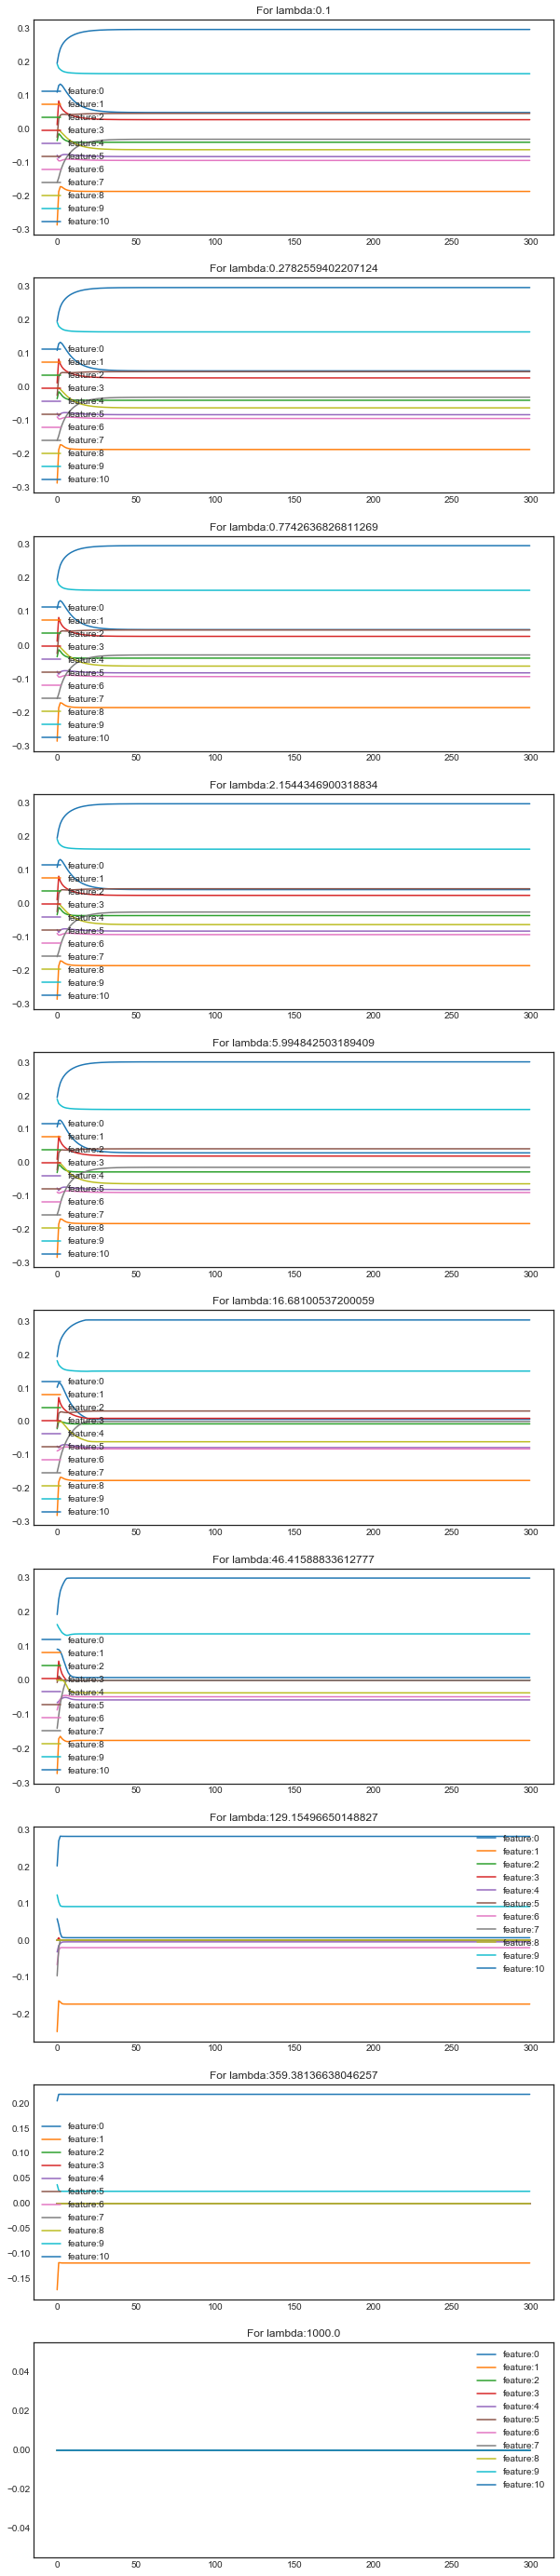

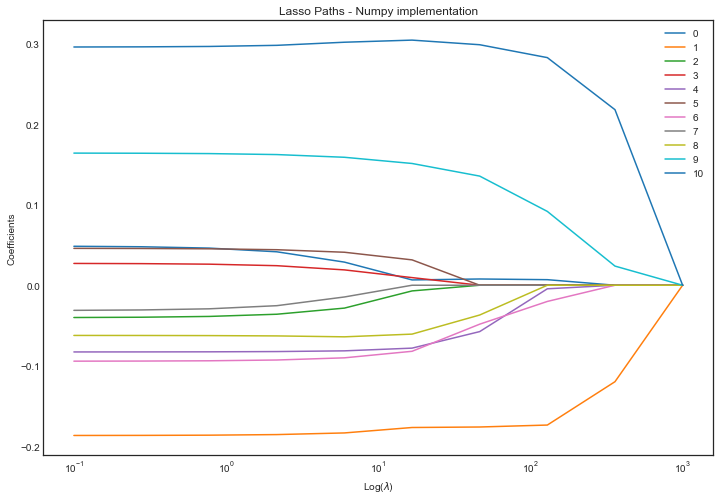

In [21]:
theta_list = list()
lamda = np.logspace(0,4,10)/10                                          #Range of lambda values
fig, ax = plt.subplots(nrows=len(lamda), ncols=1, figsize=(10,50.15))

for row , l in enumerate(lamda):
    theta, his = learn_linreg_CD(x=X_wine,y=Y_wine.flatten(), max_iter=300, lam=l)
     
    for i in range(len(theta)):
        ax[row].plot(his[i],label=f"feature:{i}")
        ax[row].legend(loc='best')
        ax[row].title.set_text(f"For lambda:{l}")
 
    theta_list.append(theta)
    
#Stack into numpy array
theta_lasso = np.stack(theta_list).T
 
#Plot results
n,_ = theta_lasso.shape
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(lamda, theta_lasso[i], label=i)
plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')

### Task C: Comparison

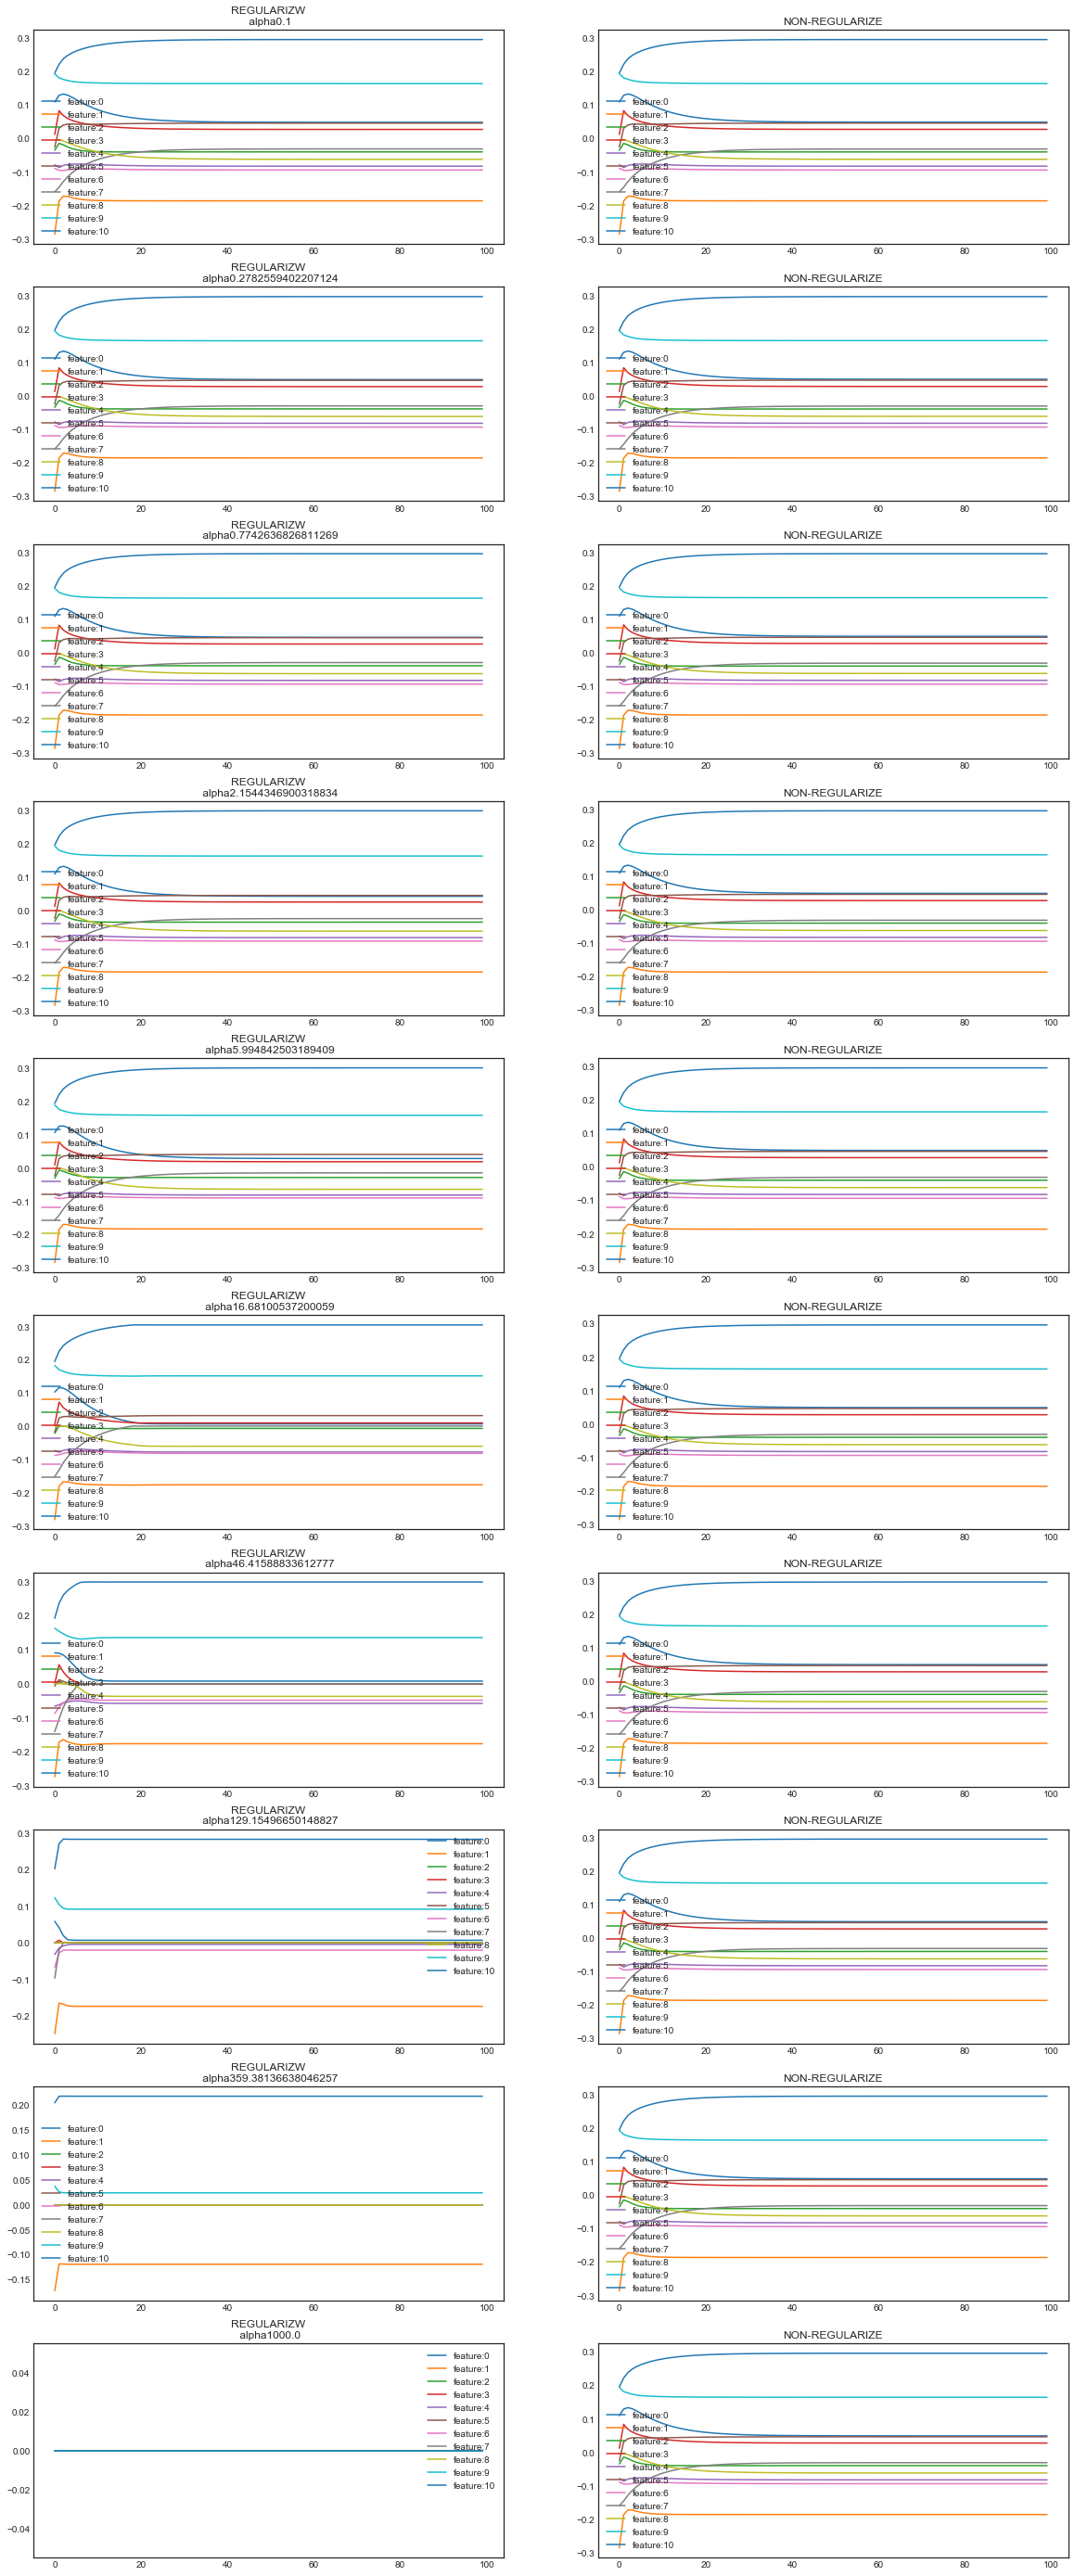

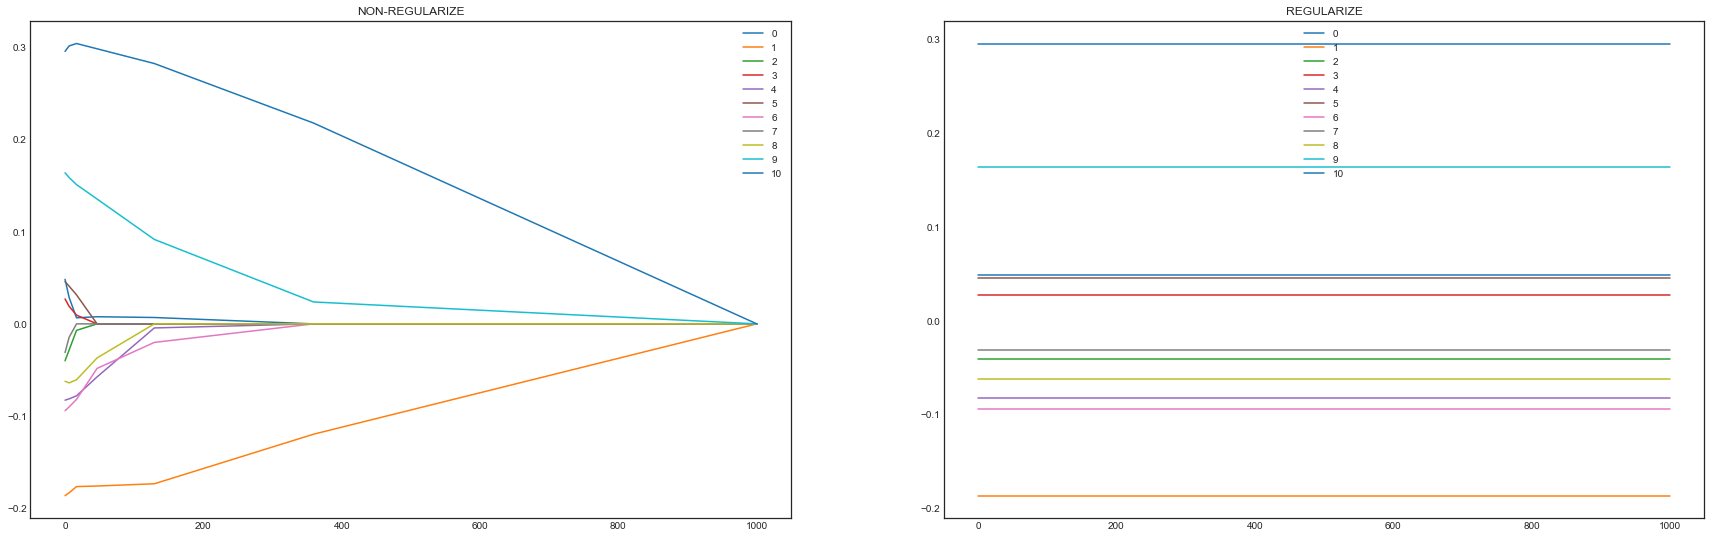

<Figure size 864x576 with 0 Axes>

In [22]:
theta_list = list()
theta_list1 = list()
lamda = np.logspace(0,4,10)/10                                         #Range of lambda values
fig, ax = plt.subplots(nrows=len(lamda),ncols=2, figsize=(20,50.15))
fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(30,9.15))

for row , l in enumerate(lamda):
    theta, his         = learn_linreg_CD(x=X_wine,y=Y_wine.flatten(), max_iter=100, lam=l)
    theta_non, his_non = learn_linreg_CD(x=X_wine,y=Y_wine.flatten(), max_iter=100)
     
    for i in range(len(theta)):
        ax[row][0].plot(his[i],label=f"feature:{i}")
        ax[row][0].legend(loc='best')
        ax[row][0].title.set_text(f"REGULARIZW\n alpha{l}")
        
        ax[row][1].plot(his_non[i],label=f"feature:{i}")
        ax[row][1].legend(loc='best')
        ax[row][1].title.set_text("NON-REGULARIZE")
 
    theta_list.append(theta)
    theta_list1.append(theta_non)


    
#Stack into numpy array
theta_lasso = np.stack(theta_list).T
theta_lasso1 = np.stack(theta_list1).T
 
#Plot results
n,_ = theta_lasso.shape
plt.figure(figsize = (12,8))

for i in range(n):
    ax1[0].plot(lamda, theta_lasso[i], label=i)
ax1[0].legend(loc='best')
ax1[0].title.set_text("NON-REGULARIZE")

for i in range(n):
    ax1[1].plot(lamda, theta_lasso1[i], label=i)
ax1[1].legend(loc='best')
ax1[1].title.set_text("REGULARIZE")


### Conclusion:
We Notice that L1 regulariztion, force the feature to zeros. It can infere that by tuning the hyperparameter alpha, one cane select usefull feature and throw away those that do not contribute to learning. In L1 the increase of the hyperparameter, increase the penality constain

### Comparing CD and GD 

In [44]:
def predict(X, Theta):
    return np.dot(X, Theta)

def lin_func(X,Y,Theta):
    M = len(Y)
     
    return np.sum((Y-predict(X,Theta))**2)*(1/(2*M))

def f_partial(X,Y,para):
    
    #p = X.T.dot(Y-predict(X,para)
    p = np.dot(X.T,(Y-predict(X,para)))
    return p

def costf(X, y, param):
    return np.sum((X.dot(param) - y) ** 2)/(2 * len(y))


                   

def minimize_GD_f(X, Y, para_init,lr, max_iter):
     
    cost_history = [0] * (max_iter+1)
    cost_history[0] = costf(X, Y, para_init)
    for p in range(max_iter):

       
        f_ini         = lin_func(X,Y,para_init)
        grad          = f_partial(X,Y, para_init)/len(Y)
        para_nex      = para_init + lr*grad
        f_nex         = lin_func(X,Y, para_nex)
        
        cost_history[p+1] = f_nex
        
        para_init = para_nex
    return  cost_history

def learn_linreg_GD(X, Y,lr, max_iter ):
    "Fit the model and return Theta values"
    ones = np.ones(X.shape[0]).reshape(-1,1)
    X = np.hstack([ones, X])
    Theta_0  = np.ones(X.shape[1]).reshape(-1,1)  # the dimention of theta = number of features
    
    return minimize_GD_f(X,Y,Theta_0,lr, max_iter)


def linreg_CD(x,y, b_0=None, max_iter=300,  intercep=False):
    
    if intercep:                                     #adding the intercep to the X 
        ones = np.ones(x.shape[0]).reshape(-1,1)
        x    = np.hstack([ones, x])
        #ones_tes = np.ones(X_test.shape[0]).reshape(-1,1)
        #X_test    = np.hstack([ones_tes, X_test])
    if  np.any(b_0) == None:
        b_0     = np.zeros(x.shape[1]) 
    cost_history = [0] * (max_iter+1)
    cost_history[0] = costf(x, y, b_0)
    b_new = b_0
    for it in range(max_iter):  
        for f in range(len(b_0)):
            b_new[f] = g(x,y,b_new,f)
            cost = lin_func(x,y, b_new)
            #=============================I divide by the len(of the target)+++++
        cost_history[it+1] = cost/len(y)

    return  cost_history




(-5.0, 105.0, -0.8853735093124526, 18.869301868291046)

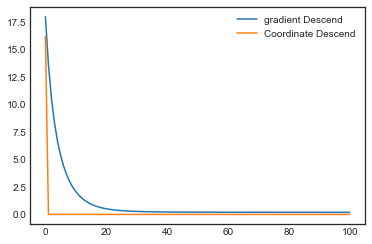

In [45]:
loss_cd = linreg_CD(x=X_wine,y=Y_wine.flatten(), max_iter=100)
loss_GD = learn_linreg_GD(X=X_wine, Y=Y_wine,lr=0.1, max_iter=100 )

plt.plot(range(len(loss_GD)), loss_GD, label="gradient Descend")    
plt.plot(range(len(loss_cd)), loss_cd, label="Coordinate Descend")    
plt.legend()
plt.axis('tight')

In [ ]:
# plotint the result 

plt.figure(figsize = (12,8))
theta, loss_cd = linreg_CD_f(x=X_wine,y=Y_wine.flatten(), max_iter=300)
Theta,  to_plot = learn_linreg_GD(X_wine,Y_wine,lr=0.1 ,max_iter=300)
lists =  to_plot.items() 
x, y = zip(*lists) 
lists_cd =  loss_cd.items()
x1, y1 = zip(*lists_cd)
plt.plot(x,y, label="gradient Descend")
plt.plot(x1,y1, label="CD")
plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')
